In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch import nn, optim
import numpy as np


In [0]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

In [0]:
trainset = datasets.MNIST('./mnist', download=True, train=True, transform=transform)
valset = datasets.MNIST('./mnist', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)


Extracting ./mnist/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist/MNIST/raw



Extracting ./mnist/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist/MNIST/raw



Extracting ./mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist/MNIST/raw



Extracting ./mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist/MNIST/raw
Processing...
Done!


In [0]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


tensor(5)


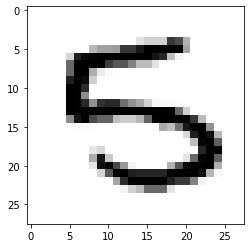

In [0]:
plt.imshow(images[63].numpy().squeeze(), cmap='gray_r');
print(labels[63])

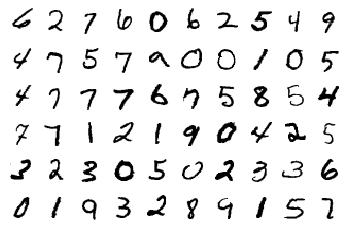

In [0]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [0]:
class Net(nn.Module):
  def __init__(self):
    super(Net,self).__init__()
    self.inp_layer = nn.Conv2d(1,32,5)
    self.hidden_layer = nn.Conv2d(32,64,5)
    self.fc1 = nn.Linear(64*4*4,120)
    self.fc2 = nn.Linear(120,60)
    self.output = nn.Linear(60,10)
  def forward(self,x):
    x = self.inp_layer(x)
    x = F.relu(x)
    x = F.max_pool2d(x,kernel_size=2,stride=2)
    
    x = self.hidden_layer(x)
    x = F.relu(x)
    x = F.max_pool2d(x,kernel_size=2,stride=2)

    x = x.reshape(-1,64*4*4)
    x = self.fc1(x)
    x = self.fc2(x)
    x = self.output(x)
    x = F.log_softmax(x, dim=1)
    return x

net = Net()


In [0]:
from torch.optim.lr_scheduler import StepLR
optimizer = optim.Adadelta(net.parameters(), lr=1.0)
epochs = 14
device = torch.device("cpu")
scheduler = StepLR(optimizer, step_size=1, gamma=0.7)
for i in range(epochs):
  for idx,(data,labels) in enumerate(trainloader):
    data, labels = data.to(device), labels.to(device)
    predict = net(data)
    optimizer.zero_grad()
    loss = F.nll_loss(predict, labels)
    loss.backward()
    optimizer.step()
    if idx % 10 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                i, idx * len(data), len(trainloader.dataset),
                100. * idx / len(trainloader), loss.item()))
  test_loss = 0
  correct = 0
  with torch.no_grad():
        for data, target in valloader:
            data, target = data.to(device), target.to(device)
            output = net(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

  test_loss /= len(valloader.dataset)

  print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(valloader.dataset),
        100. * correct / len(valloader.dataset)))
  scheduler.step()
 

Train Epoch: 0 [0/60000 (0%)]	Loss: 0.002207
Train Epoch: 0 [640/60000 (1%)]	Loss: 0.000142
Train Epoch: 0 [1280/60000 (2%)]	Loss: 0.004795
Train Epoch: 0 [1920/60000 (3%)]	Loss: 0.091742
Train Epoch: 0 [2560/60000 (4%)]	Loss: 0.000250
Train Epoch: 0 [3200/60000 (5%)]	Loss: 0.015928
Train Epoch: 0 [3840/60000 (6%)]	Loss: 0.001928
Train Epoch: 0 [4480/60000 (7%)]	Loss: 0.064392
Train Epoch: 0 [5120/60000 (9%)]	Loss: 0.001615
Train Epoch: 0 [5760/60000 (10%)]	Loss: 0.008304
Train Epoch: 0 [6400/60000 (11%)]	Loss: 0.109297
Train Epoch: 0 [7040/60000 (12%)]	Loss: 0.049689
Train Epoch: 0 [7680/60000 (13%)]	Loss: 0.002898
Train Epoch: 0 [8320/60000 (14%)]	Loss: 0.002332
Train Epoch: 0 [8960/60000 (15%)]	Loss: 0.006533
Train Epoch: 0 [9600/60000 (16%)]	Loss: 0.044097
Train Epoch: 0 [10240/60000 (17%)]	Loss: 0.017543
Train Epoch: 0 [10880/60000 (18%)]	Loss: 0.006277
Train Epoch: 0 [11520/60000 (19%)]	Loss: 0.000904
Train Epoch: 0 [12160/60000 (20%)]	Loss: 0.014980
Train Epoch: 0 [12800/60000 (